# Customer Churn Analysis for Improving Customer Retention
---
__Author Name : Shreyansh Padarha__<br>
__Email : mailto:shreyansh.padarha@hotmail.com__

---

### Note
Please refere the Observations and inferences that are mentioned below graphs/code outputs, for better understanding.

---
# Importing dataset

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel("customer_churn_data.xlsx")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           4000 non-null   int64  
 1   CustomerName         4000 non-null   object 
 2   CONTINUE             4000 non-null   object 
 3   CIBILScore           4000 non-null   int64  
 4   Place                4000 non-null   object 
 5   Rewards              4000 non-null   int64  
 6   AccountType          4000 non-null   object 
 7   Feedback             4000 non-null   int64  
 8   EverRaisedComplaint  4000 non-null   object 
 9   Age                  4000 non-null   int64  
 10  Gender               4000 non-null   object 
 11  Tenure               4000 non-null   int64  
 12  Balance              4000 non-null   float64
 13  Salary               4000 non-null   float64
 14  CreditCard           4000 non-null   object 
dtypes: float64(2), int64(6), object(7)
mem

__Inference:__<br>
There are a total of 4000 enteries within the dataset

In [3]:
df.describe()

,CustomerID,CIBILScore,Rewards,Feedback,Age,Tenure,Balance,Salary
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,125477.209250,652.440750,613.300000,3.009000,39.259500,5.960250,71564.497191,110992.996969
std,71589.893483,96.681536,227.146467,1.413477,10.613356,2.905216,59034.786089,63144.965284
min,258.000000,353.000000,122.000000,1.000000,18.000000,1.000000,0.000000,196.009000
25%,63473.250000,586.000000,419.000000,2.000000,32.000000,3.000000,0.000000,56841.485250
50%,125664.500000,654.000000,612.000000,3.000000,38.000000,6.000000,91575.563500,112891.647000
75%,187260.250000,719.000000,808.000000,4.000000,45.000000,8.000000,120502.035125,163851.402000
max,250247.000000,852.000000,1003.000000,5.000000,85.000000,11.000000,226468.182000,219991.728000


In [4]:
df.isna().sum()

CustomerID             0
CustomerName           0
CONTINUE               0
CIBILScore             0
Place                  0
Rewards                0
AccountType            0
Feedback               0
EverRaisedComplaint    0
Age                    0
Gender                 0
Tenure                 0
Balance                0
Salary                 0
CreditCard             0
dtype: int64

__Inference:__<br>
No NA/Missing values in the dataset.

# Anlaysing Data Spread / Distribution

### Gender

In [5]:
df.Gender.value_counts()

FM    4000
Name: Gender, dtype: int64

__Inference__<br>
As thre is only one unique data value within the gender column, it can be conidered redundant and dropped

In [6]:
df = df.drop("Gender",axis=1)

### Rewards

<AxesSubplot:xlabel='Rewards', ylabel='Density'>

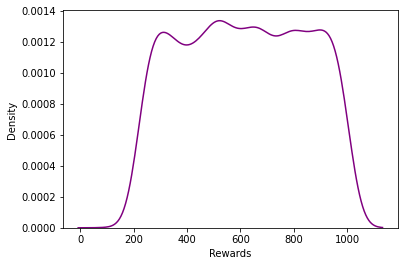

In [7]:
import seaborn as sns
sns.kdeplot(data=df,x="Rewards",c="purple")

__Inference:__<br>
The rewards data follows a relative Bell Curve. The data data is highly concentrated within the 200 and 1000 range, but is well distributed.

### Balance

<AxesSubplot:xlabel='Balance', ylabel='Density'>

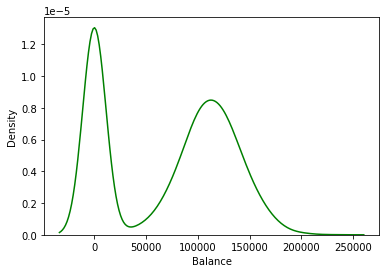

In [8]:
sns.kdeplot(data=df,x="Balance",c="green")

__Inference__<br>
The bank balance data spread is extremely erratic, there is a high frequency of bank accounts with balance in the range of ```75K to 120K```, second only to``` 0``` balance, which has the highests frequency.

### CIBIL Score

<AxesSubplot:xlabel='CIBILScore', ylabel='Density'>

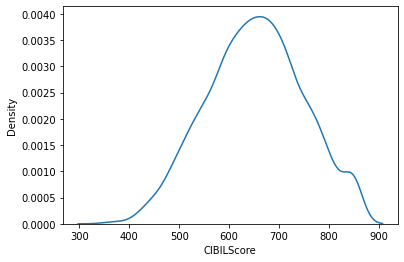

In [9]:
sns.kdeplot(data=df,x="CIBILScore")

__Inference:__<br>
The CIBILScore is following gaussian distribution and ranges premitively between 400 and 900.


### Salary

<AxesSubplot:xlabel='Salary', ylabel='Density'>

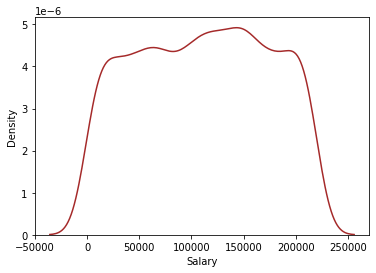

In [10]:
sns.kdeplot(data=df,x="Salary",color="Brown")

__Inference__<br>
The salary ranges primitively from 0 to 200,000, this indicates, that there might be many students who would be having zero income but have a bank account with BSCDS.

### Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

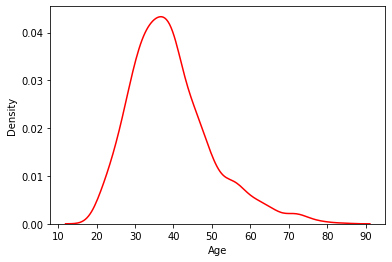

In [11]:
sns.kdeplot(data=df,x="Age",color="red")

__Inference__<Br>
The age is strongly concentrated around the age group 25 - 50, the data follows gaussian distribution

### Continuing / Not Continuing

Continuing        2976
Not Continuing    1024
Name: CONTINUE, dtype: int64


<AxesSubplot:xlabel='CONTINUE', ylabel='count'>

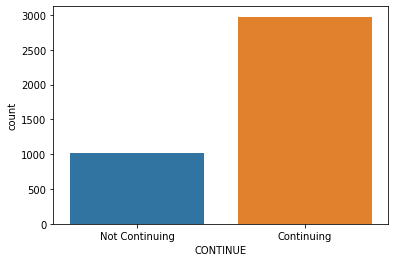

In [12]:
print(df.CONTINUE.value_counts())
sns.countplot(data=df,x="CONTINUE")

__Inference__:<br>
As expected, similar to fraud detection, the data available has more people continuing within it than people who are leaving.
- Continuing  -->      2976
- Not Continuing -->   1024

### Place

Mumbai       1983
Bangalore    1040
Pune          977
Name: Place, dtype: int64


<AxesSubplot:xlabel='Place', ylabel='count'>

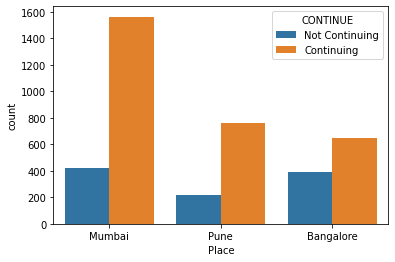

In [13]:
print(df.Place.value_counts())
sns.countplot(data=df,x="Place",hue="CONTINUE")

__Inference__<br>
- There are three locations within the dataset ```Mumbai```, ```Pune```, ```Bangalore```. Most number of bank accounts in the dataset are registered from Mumbai, which might be because Mumbai is the most populous country in India. 
- An interesting thing to note is that people from Bangalore have the highest company leaving (Not Continuing) ratio followe by Pune and least in Mumbai.

__Inference__:<br>

### EverRaisedComplaint

NO     2974
YES    1026
Name: EverRaisedComplaint, dtype: int64


<AxesSubplot:xlabel='EverRaisedComplaint', ylabel='count'>

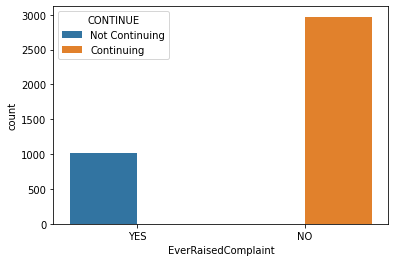

In [14]:
print(df.EverRaisedComplaint.value_counts())
sns.countplot(data=df,x="EverRaisedComplaint",hue="CONTINUE")

__Inference__:<br>
It Can be seen that whoever eaised a complaint is not continuing with BSCDS services. There are 1026 such people.

### Credit Card

YES    2788
NO     1212
Name: CreditCard, dtype: int64


<AxesSubplot:xlabel='CreditCard', ylabel='count'>

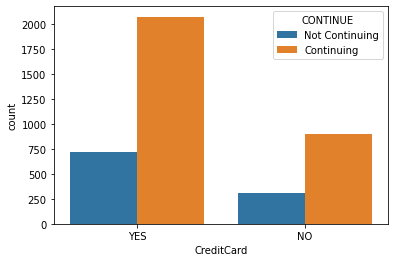

In [15]:
print(df.CreditCard.value_counts())
sns.countplot(data=df,x="CreditCard",hue="CONTINUE")

__Inference__<br>
The data has significantly more (double++) number of credit card holders than non credit card holders. 26% of crdit card holders have Not continued, compared to 24% of non-credit card holders.

### AccountType	

DIAMOND     1024
PLATINUM    1024
SILVER      1019
GOLD         933
Name: AccountType, dtype: int64


<AxesSubplot:xlabel='AccountType', ylabel='count'>

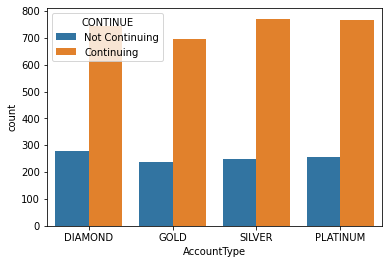

In [16]:
print(df.AccountType.value_counts())
sns.countplot(data=df,x="AccountType",hue="CONTINUE")

__Inference__<br>
The Account Types made, don't seem to have an impact on whether a customer is continuing or not. But the data is well spread, and suitable for analysis. Diamond account holders, have a marginal (slight) higher number of non-continuing customers. This might indicate dis-satisfaction, or not enought returns on high account investments.

### Feedback

4    811
5    803
3    798
2    795
1    793
Name: Feedback, dtype: int64


<AxesSubplot:xlabel='Feedback', ylabel='count'>

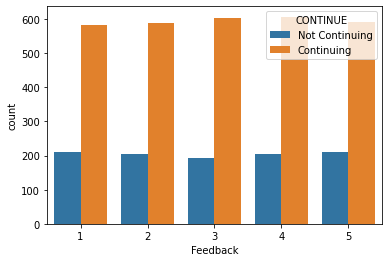

In [17]:
print(df.Feedback.value_counts())
sns.countplot(data=df,x="Feedback",hue="CONTINUE")

__Inference__<br>
The feedbacks made, don't seem to have an impact on whether a customer is continuing or not. But the data is well spread, and suitable for analysis.

# EDA

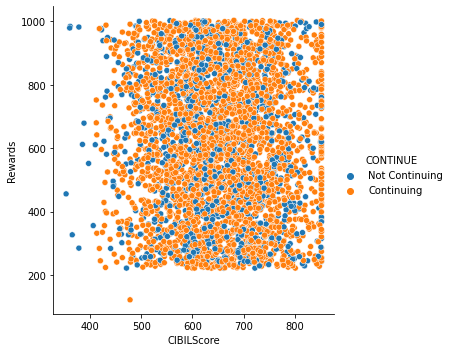

In [18]:
sns.relplot(data=df,x="CIBILScore",y='Rewards',hue="CONTINUE")

__Inference:__<br>
There is no visible pattern between Rewards earned and CIBILScore, which is generally the case. As, the better CIBILScore, the better the spending patterns, and higher the rewards. This indicates, that the dataset might have been artificially generated A.K.A. synthetic in nature.

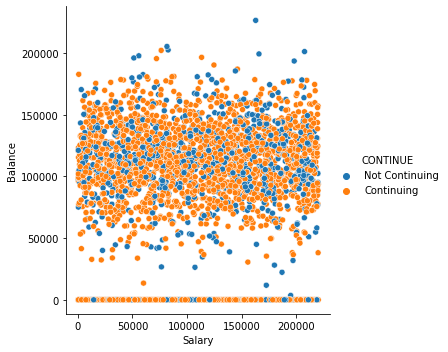

In [19]:
sns.relplot(data=df,x="Salary",y='Balance',hue="CONTINUE")

__Inference:__<br>
There is no visible pattern between continuation status and the balance, or salary of an account holder

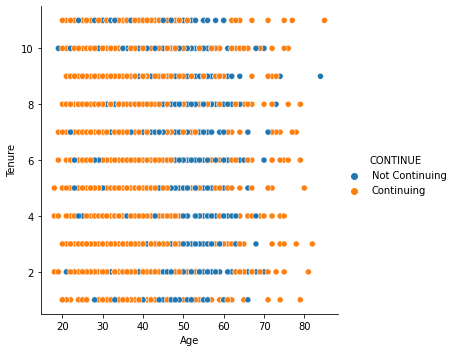

In [20]:
sns.relplot(data=df,x="Age",y='Tenure',hue="CONTINUE")

__Inference:__<br>
- The Age vs Tenure plot, strongly supports the hypothesis, that one of the features is synthetic in nature, as at age 20 there are multiple bank holdings with tenure above 2 years. This should not be possible, unless the bank grants accounts to minors as child account.

- It can also be seen that through various tenures the number of people not-continuing are similar.

- The Age of individuals, seem to have a big impact, on customr retention. Post 45, many customers have left the bank. If a developing country, this might be due to premature deaths, or bad financial decisons causing Bankruptcy.

<AxesSubplot:xlabel='CONTINUE', ylabel='Age'>

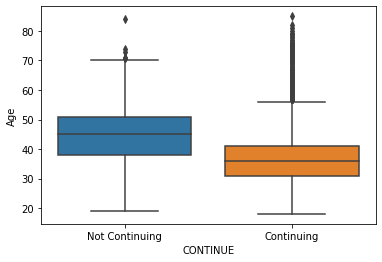

In [21]:
sns.boxplot(data=df, x="CONTINUE", y= "Age")

__Inference:__<br>
The Age of individuals, seem to have a big impact, on customr retention. Post 45, many customers have left the bank. If a developing country, this might be due to premature deaths, or bad financial decisons causing Bankruptcy

# Data Pre-Processing

In [22]:
#Creating a copy of the data variable to apply pre-processing upon
df_pp = df.copy()
df_pp.sample(3)

,CustomerID,CustomerName,CONTINUE,CIBILScore,Place,Rewards,AccountType,Feedback,EverRaisedComplaint,Age,Tenure,Balance,Salary,CreditCard
3397,108304,Ay,Continuing,521,Mumbai,944,DIAMOND,1,NO,22,9,0.0,184308.366,NO
2776,240247,Ch,Not Continuing,696,Pune,299,SILVER,4,YES,35,8,0.0,146927.473,YES
945,41170,Sa,Not Continuing,657,Mumbai,719,DIAMOND,4,YES,59,8,0.0,97854.339,YES


### Dropping irrelevant columns "CustomerID" & "CustomerName"

In [23]:
df_pp = df_pp.drop (["CustomerID","CustomerName"],axis =1)

In [24]:
df_pp.sample(3)

,CONTINUE,CIBILScore,Place,Rewards,AccountType,Feedback,EverRaisedComplaint,Age,Tenure,Balance,Salary,CreditCard
3347,Continuing,573,Mumbai,399,DIAMOND,5,NO,30,5,81468.067,159627.545,YES
1105,Continuing,624,Mumbai,307,SILVER,3,NO,38,5,93708.703,121503.789,YES
771,Continuing,633,Mumbai,464,SILVER,1,NO,34,5,118160.183,117582.201,YES


### Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

#User Defined function to label encode, the values
def label_encode(x):
    le = LabelEncoder()
    x_fitted = le.fit_transform(x)
    return x_fitted

In [26]:
#Columns that need to be Label Encoded
le_arr = ['CONTINUE','Place','EverRaisedComplaint','CreditCard']

for le_col in le_arr:
    df_pp
    df_pp[le_col] = label_encode(df_pp[le_col].values)

### Ordinal Encoding

In [27]:
from sklearn.preprocessing import OrdinalEncoder

def ordinal_encode(x):
    oe = LabelEncoder()
    x_fitted = oe.fit_transform(x)
    return x_fitted

In [28]:
oe_arr = ['AccountType']

for oe_col in oe_arr:
    df_pp[oe_col] = ordinal_encode(df_pp[oe_col].values)

In [29]:
#Setting the Target variable in the end for cross verifying
df_pp["Target"] = df_pp.CONTINUE.values
df_pp = df_pp.drop("CONTINUE",axis = 1)

In [30]:
df_pp.sample(5)

,CIBILScore,Place,Rewards,AccountType,Feedback,EverRaisedComplaint,Age,Tenure,Balance,Salary,CreditCard,Target
3666,618,1,864,2,1,1,31,4,129949.6830,65281.040,1,1
1334,713,0,355,0,2,0,35,3,126927.3625,132644.952,1,0
1689,606,2,671,2,2,0,39,8,93616.9045,57560.327,1,0
1361,535,1,288,1,2,1,39,3,0.0000,81036.934,0,1
2572,618,0,339,2,2,0,57,8,111089.9695,114817.296,1,0


### Standard Scaling
__Note:__ We won't be min max scalling any feature as we will be taking outlieres into considereation for our model, and we also wan't to perform multi-variate analysis. Additionally, most attributes are already following gaussian distribution.

In [31]:
from sklearn.preprocessing import StandardScaler
def standard_scale(x):
    ss = StandardScaler()
    ss_fitted = ss.fit_transform(x.reshape(-1, 1))
    return ss_fitted.flatten()

In [49]:
#Standard Scaling all the columns
ss_cols = df_pp.drop("Target",axis=1).columns

for col in ss_cols:
    df_pp[col] = standard_scale(df_pp[col].values)

In [50]:
df_pp.sample(5)

,CIBILScore,Place,Rewards,AccountType,Feedback,EverRaisedComplaint,Age,Tenure,Balance,Salary,CreditCard,Target
1315,-1.049357,-1.386402,-0.877517,-1.338722,-0.006368,-0.587358,0.917873,0.357936,0.796633,-0.128078,-1.516684,0
2850,2.064347,-1.386402,-0.133411,0.435007,-1.421495,-0.587358,-0.778315,-0.674819,-0.386866,-1.138869,-1.516684,0
2188,-0.873500,-1.386402,0.412561,-1.338722,-1.421495,1.702538,-0.401384,-1.363322,0.767870,-0.603813,0.659333,1
2200,0.533356,0.022185,0.852860,-1.338722,-0.006368,1.702538,0.069779,-1.363322,0.454150,-1.588753,-1.516684,1
2711,-0.118349,0.022185,-0.305128,0.435007,-0.006368,-0.587358,-1.155246,-1.019071,-1.212394,0.424087,-1.516684,0


# KMeans (Clustering Algo)

In [51]:
X = df_pp.drop("Target",axis=1)

In [52]:
X.sample(5)

,CIBILScore,Place,Rewards,AccountType,Feedback,EverRaisedComplaint,Age,Tenure,Balance,Salary,CreditCard
582,-0.232139,0.022185,1.337190,-0.451857,-0.006368,-0.587358,-0.118686,-0.674819,-1.212394,-0.905582,0.659333
652,-2.135532,0.022185,-0.133411,-0.451857,-0.713932,-0.587358,0.069779,0.013684,0.145154,0.747997,0.659333
2848,-0.718332,-1.386402,0.760397,1.321871,-1.421495,1.702538,1.389037,-1.019071,1.242119,1.510440,0.659333
73,1.071272,1.430773,0.835248,1.321871,-1.421495,-0.587358,-0.684082,0.702187,-1.212394,-0.198301,0.659333
3064,0.036819,1.430773,-0.062963,1.321871,-0.713932,-0.587358,-0.307151,0.013684,-1.212394,0.981497,-1.516684


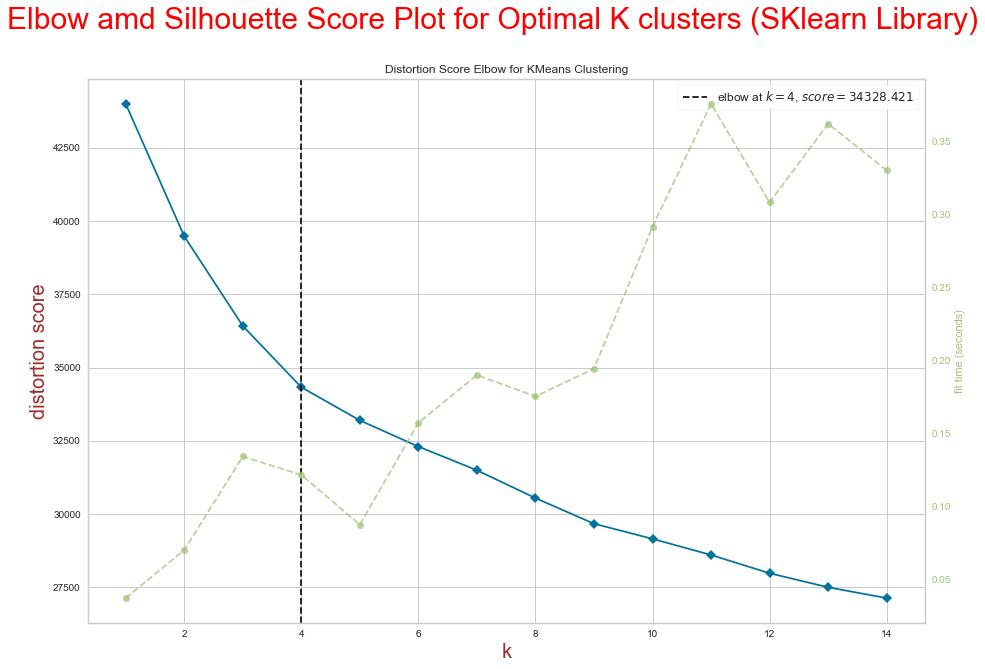

In [53]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

#Using SKlearn's Library and KElbowVisualizer to plot elbow plot and silhouette Score Comparision
km_sk = KMeans(n_init = 5,
               random_state = 42)

plt.figure(figsize=(15,10))
plt.suptitle("Elbow amd Silhouette Score Plot for Optimal K clusters (SKlearn Library)",
          c="red", 
          fontsize=30)

plt.xlabel("K", c="brown", fontsize=20)
plt.ylabel("Distortion Score", c="brown", fontsize=20)
visualizer = KElbowVisualizer(km_sk, k=(1,15)).fit(X)      
visualizer.show() 
plt.show()

__Observation__<br>
It can be seen through the silhouette method, that the optimal nunmber of k clusters are ```4```.<br>
The silhouette coefficient for k = 4, is ```3432```.

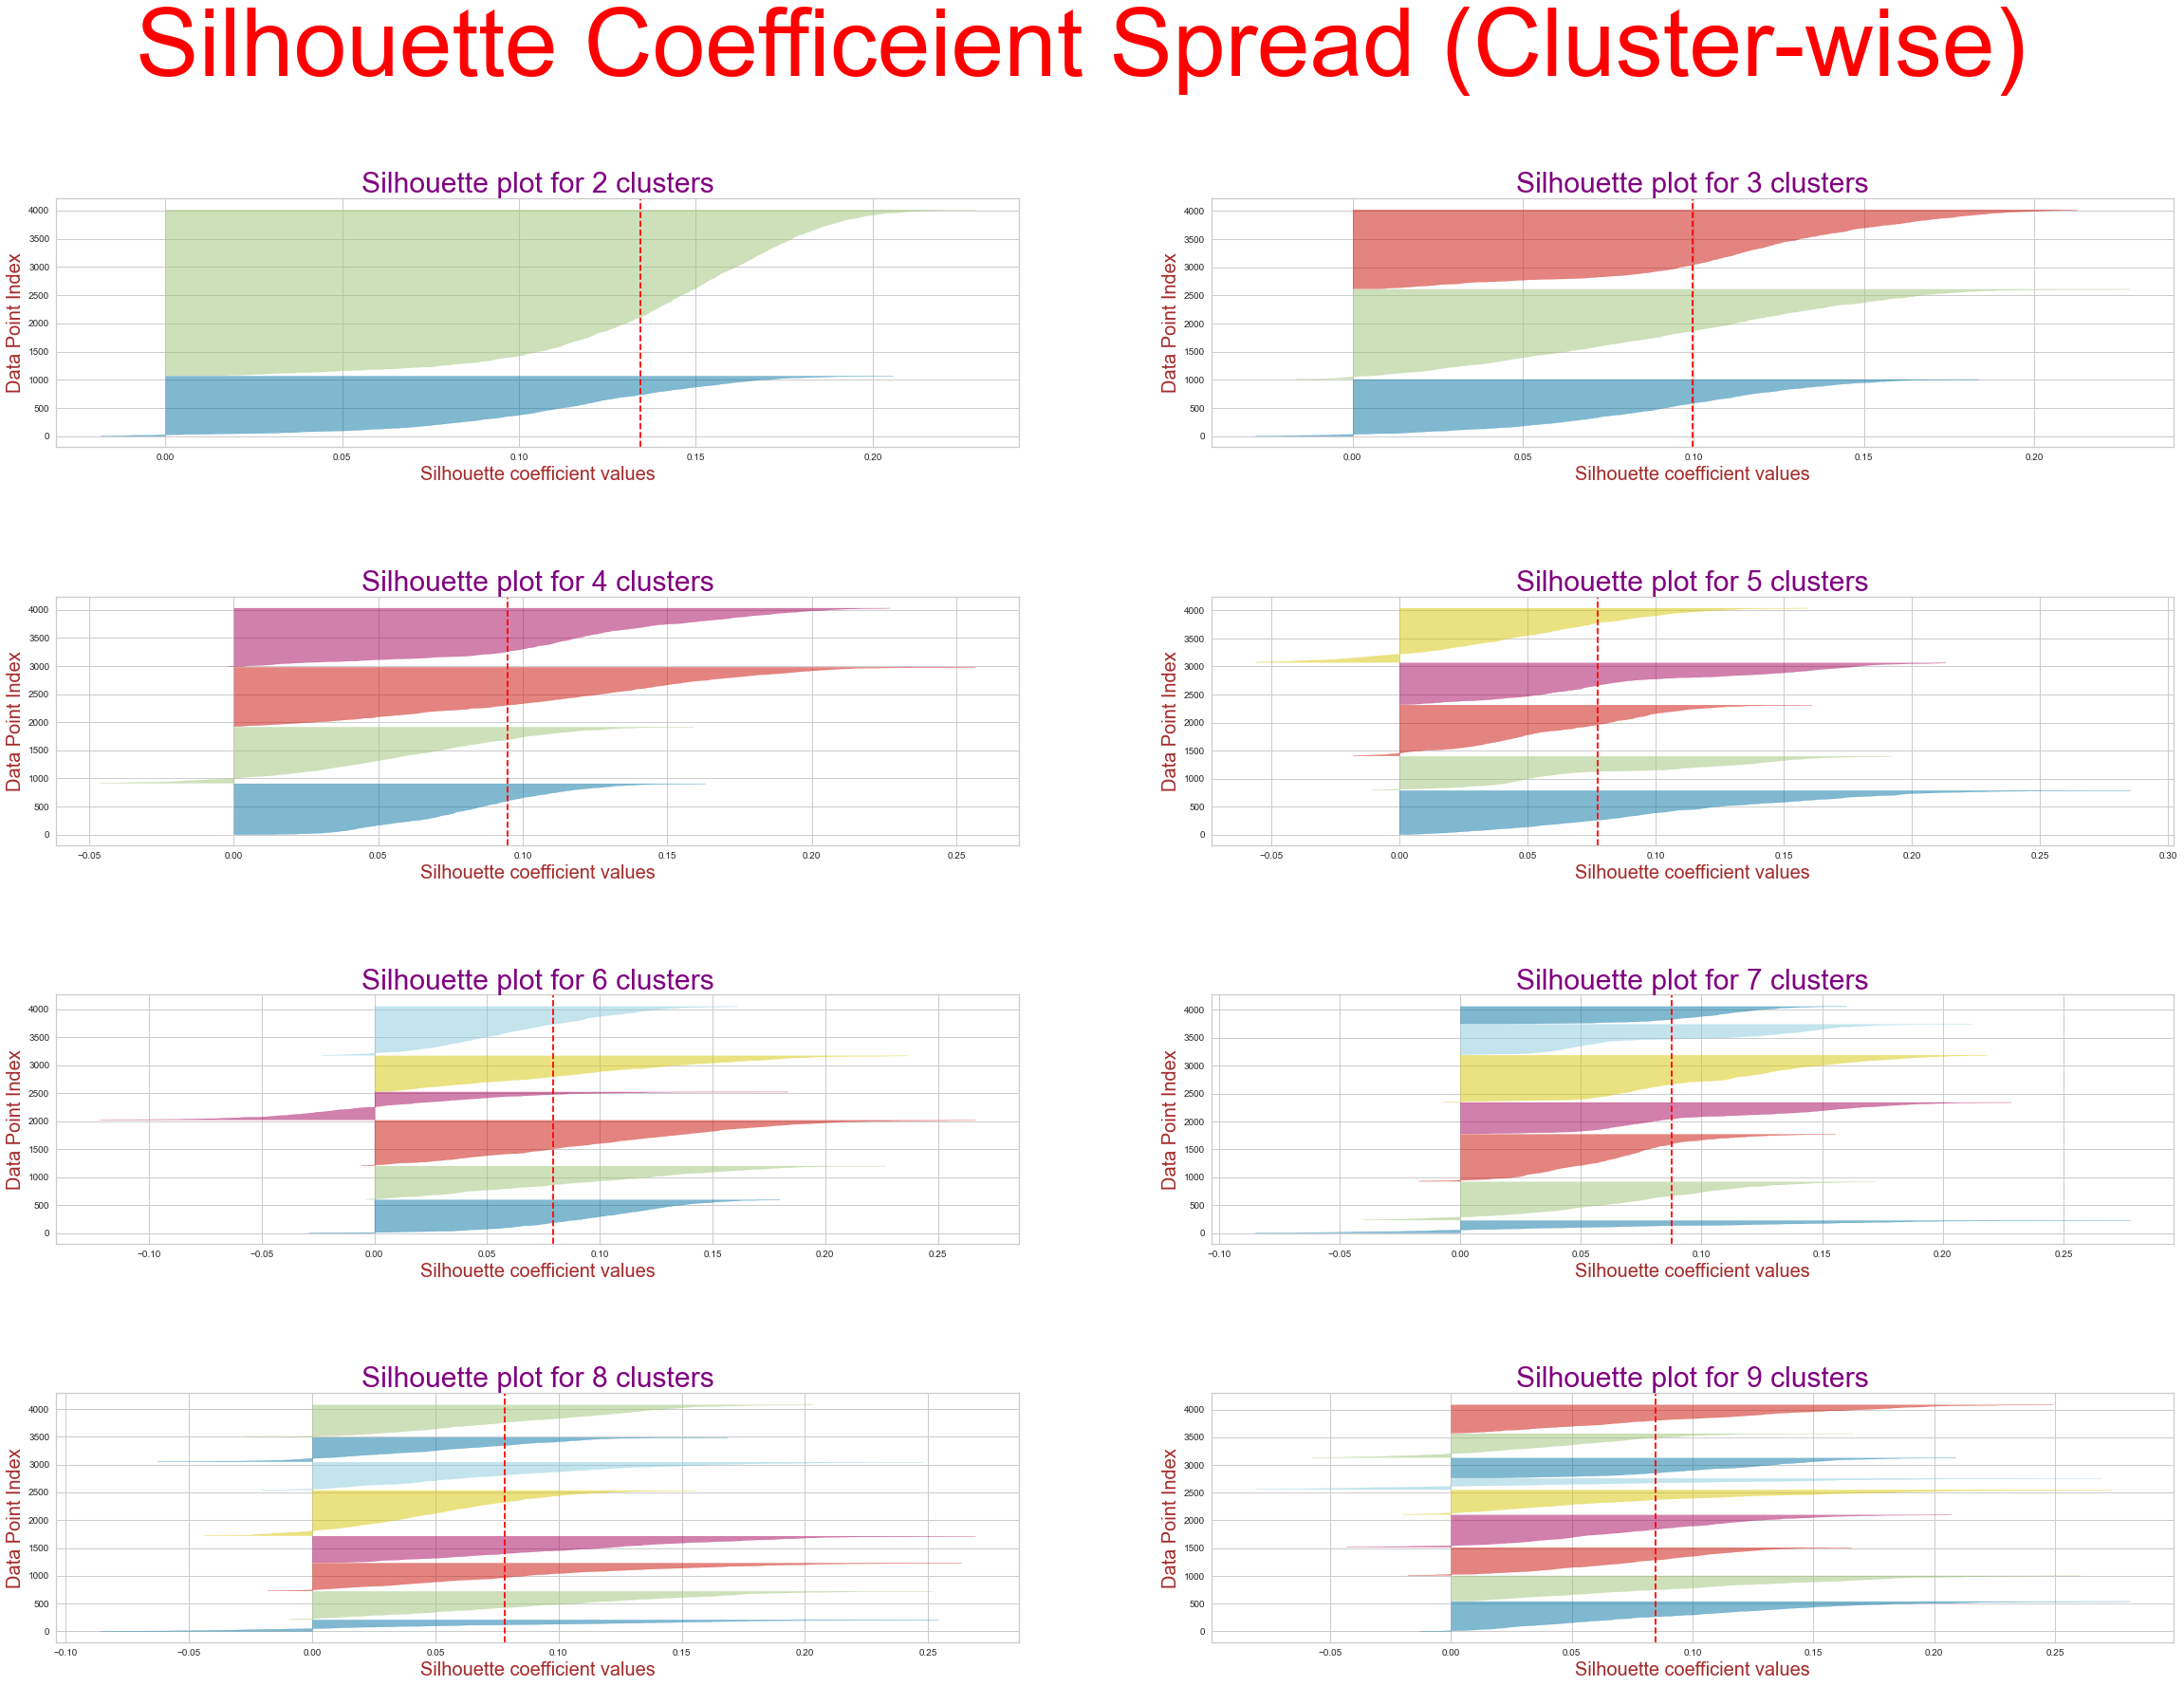

In [54]:
from yellowbrick.cluster import SilhouetteVisualizer

#List of k values
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

#Creating an overlay for the plots to fit in
plt.figure(figsize=(40,28))
plt.suptitle("Silhouette Coefficeient Spread (Cluster-wise)",c="red",fontsize=100)

#iterating for different 'k' values
for n_clusters in range_n_clusters:
    
    #creating subplots
    plt.subplot(4,2,n_clusters-1)
    #Set individual plot title and xlabel
    plt.title(f'Silhouette plot for {n_clusters} clusters', c="purple", fontsize=30)
    plt.xlabel('Silhouette coefficient values', c="brown", fontsize=20)
    plt.ylabel('Data Point Index', c="brown", fontsize=20)
    #Adjust spacing between subplots
    plt.subplots_adjust(hspace=0.6)
    
    # Instantiate the clustering model and visualizer
    model = KMeans(n_init = 5,n_clusters=n_clusters)
    model.fit(X)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    
    # Fit the data to the visualizer
    visualizer.fit(X)
    
plt.show()

__Observation__<br>
SKlearn's KMeans identifies 4 as the ideal number of clusters. Its evident from the plots that, at k = 3 and k = 4, most of the data is being representated with a high silhouette coefficient score.

### Taking two clusters into consideration, like original dataset for comparison

In [69]:
from sklearn.metrics import accuracy_score, f1_score, precision_score

# Creating an instance of the K-means algorithm with the desired number of clusters
kmeans = KMeans(n_clusters=2)

# Fitting the K-means algorithm to your data
kmeans.fit(X)

# Obtaining the predicted cluster labels
predicted_labels = kmeans.predict(X)
y = df_pp.Target.values

# Calculating accuracy
accuracy = accuracy_score(y, predicted_labels)

# Calculating F1 score
f1 = f1_score(y, predicted_labels)

# Calculating precision
precision = precision_score(y, predicted_labels)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)

Accuracy: 0.00675
F1 Score: 0.0010057832537088258
Precision: 0.0006772773450728074


__Inference:__<br>
As inertia and silhouette score are the only proper mechanism, calculating accuracy scores are useless, as its not possible to remap the predicted values from clustering to the ones in the original dataset.

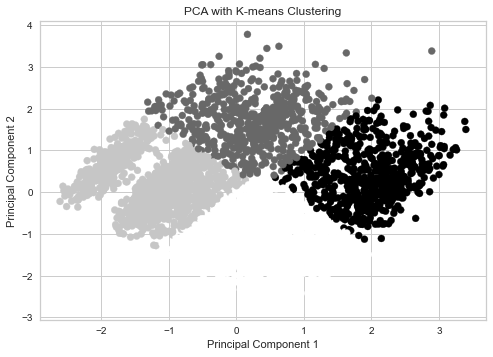

In [79]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=4)  # Replace K with the desired number of clusters
kmeans.fit(X_pca)
predicted_labels = kmeans.labels_

# Plot the data with colors representing clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with K-means Clustering')
plt.show()

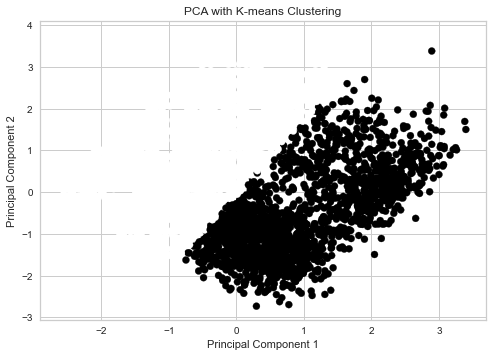

In [82]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=2)  # Replace K with the desired number of clusters
kmeans.fit(X_pca)
predicted_labels = kmeans.labels_

# Plot the data with colors representing clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predicted_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with K-means Clustering')
plt.show()

__Inferece__:<br>
The pca shows, that the clusters were segregated accurately, and the kmeans performs well at both 2 and 4.

# Random Forest (Ensemble Learning Algo)

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score

y = df_pp.Target.values

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [63]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculating F1 score
f1 = f1_score(y_test, y_pred)

# Calculating precision
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)

Accuracy: 0.995
F1 Score: 0.9894736842105263
Precision: 0.9894736842105263


__Inference__<br>
The ```Random Forest Ensemble Learning Algo``` has the following evaluation scores:
- __Accuracy__: 0.995
- __F1 Score__: 0.9894736842105263
- __Precision__: 0.9894736842105263

---